In [1]:
import pandas as pd
import plotly.graph_objects as go

Data Set 1 contains the metrics and attributes needed to produce a report which satisfies the following request:

Business Request: "How many tables have we had open? I'd like to see a daily trend of the number of open tables at the Property."

Attributes
* d_game_date -  date on which the data was recorded
* c_prop_cd  - abbreviated Property name
* c_pit_num - Describes which pit the data was captured in
* c_game_report_desc - The name of the table game
* c_game_report_type - The game category
* c_table_num - This describes which table the data was recorded on

Metrics
* Drop - sum total amount of cash patrons brought to the gaming table on that date
* f_hands_played - sum total number of hands played on the gaming table on that date
* i_minutes_played - sum total number of minutes patrons spent on the gaming table on that date
* f_theo_win - sum total amount of revenue the Casino theoretically should have generated  on the gaming table on that date
* f_actual_win - sum total amount of actual revenue the Casino generated on the gaming table on that date
* i_open_hours - sum total amount of hours the table was open on the given date

Note that not all attributes or metrics included in Data Set 1 will be needed.


In [4]:
df1 = pd.read_excel('dataset1.xlsx')

In [5]:
df1.sort_values('d_game_date', ascending = False)

,d_game_date,c_prop_cd,c_game_report_desc,c_game_report_type,c_table_num,Drop,f_hands_played,i_minutes_played,f_theo_win,f_actual_win,i_open_hours
3590,2020-11-21,ABC,Crazy Four Poker,Poker Derivative,506,5184,1608,2346,1347.84,-6768,23
1905,2020-11-21,ABC,Midi Baccarat,Baccarat,112,4374,1239,616,699.84,-19096,22
3717,2020-11-21,ABC,Three Card Poker,Poker Derivative,3,5500,1272,1700,825.00,-9554,17
986,2020-11-21,ABC,Roulette,Roulette,205,2550,1452,2100,637.50,-12020,21
2254,2020-11-21,ABC,BJ Shoe Hit 17,Blackjack,302,5346,1007,2664,908.82,17195,18
...,...,...,...,...,...,...,...,...,...,...,...
3520,2020-10-01,ABC,BJ Shoe Stand 17,Blackjack,154,780,576,4032,117.00,-7640,21
320,2020-10-01,ABC,Nepal Baccarat,Baccarat,203,1152,1314,1242,241.92,10464,9
1775,2020-10-01,ABC,Midi Baccarat,Baccarat,193,6144,637,1484,983.04,1780,14
2188,2020-10-01,ABC,BJ Shoe Hit 17,Blackjack,308,2088,1540,600,354.96,-8078,5


In [6]:
df1['actul win over minutes played'] = df1['f_actual_win'] / df1['i_minutes_played']

In [7]:
#only one property ABC
print(df1.c_prop_cd.unique())
print(df1.c_game_report_desc.unique())
print(df1.c_game_report_type.unique())

['ABC']
['Face Up Pai Gow' 'Free Bet BJ 6 to 5' 'Nepal Baccarat' 'TZ Roulette'
 'SZ Roulette' 'Craps' 'Big Six' 'Roulette' 'Let It Ride' 'Midi Baccarat'
 'Pai Gow Tiles' 'BJ Shoe Hit 17' 'Fortune Pai Gow' 'High Card Flush'
 'BJ Double Hit 17' 'BJ Shoe (6 to 5)' 'BJ Shoe Stand 17'
 'Crazy Four Poker' 'Mississippi Stud' 'Three Card Poker'
 'Ult Texas Holdem']
['Pai Gow' 'Blackjack' 'Baccarat' 'Roulette' 'Craps' 'Other'
 'Poker Derivative']


In [8]:
df1.sort_values(by = 'd_game_date').tail(20)

,d_game_date,c_prop_cd,c_game_report_desc,c_game_report_type,c_table_num,Drop,f_hands_played,i_minutes_played,f_theo_win,f_actual_win,i_open_hours,actul win over minutes played
1388,2020-11-21,ABC,Midi Baccarat,Baccarat,193,2432,1080,2961,389.12,-1449,21,-0.489362
1409,2020-11-21,ABC,Midi Baccarat,Baccarat,128,2940,1100,4992,470.40,2553,24,0.511418
3809,2020-11-21,ABC,Three Card Poker,Poker Derivative,502,4752,874,440,712.80,-13000,20,-29.545455
1252,2020-11-21,ABC,Midi Baccarat,Baccarat,145,2300,1314,2280,368.00,-10460,20,-4.587719
1443,2020-11-21,ABC,Midi Baccarat,Baccarat,191,2976,960,799,476.16,4148,17,5.191489
2742,2020-11-21,ABC,BJ Double Hit 17,Blackjack,151,2706,1056,3264,703.56,11440,16,3.504902
1458,2020-11-21,ABC,Midi Baccarat,Baccarat,116,3450,1072,3174,552.00,-12282,23,-3.869565
2315,2020-11-21,ABC,BJ Shoe Hit 17,Blackjack,308,3540,1425,1664,601.80,15120,16,9.086538
450,2020-11-21,ABC,Craps,Craps,401,6417,918,2100,1347.57,-12767,21,-6.079524
1460,2020-11-21,ABC,Midi Baccarat,Baccarat,190,3820,936,954,611.20,-9776,18,-10.247379


In [100]:
df1.to_csv('df1.csv')

In [9]:
#140 Unique Tables 
#have to create a pivot table to do the analysis 
#in streamlit make it so you are able to select the table name and it outputs the stats over time in plotly 
#do bar chart comparison 
#do box and whiskers comparison 
#do distribution 
df1['c_table_num'].nunique()

140

In [16]:
from collections import Counter
table_count =pd.DataFrame(Counter(df1['c_table_num']).items()).rename(columns = {0:'table number', 1: 'count'}).sort_values(by = 'count', ascending = False)

In [34]:
table_count['table number'] = table_count['table number'].astype('str')

In [38]:
table_count.to_json('table_count.json')

In [43]:
table_count1 = table_count.head(30)

In [44]:
fig = go.Figure([go.Bar(x = table_count1['table number'], y = table_count1['count'])])
fig.update_traces(marker_color = 'rgb(158,202, 225)', marker_line_color = 'rgb(8,48,107)',
                 marker_line_width = 1.5, opacity = 0.6)
fig.update_layout(title_text = 'Table Number and Count', width = 700, height = 1300)
fig.show()

The property had 140 tables open

In [123]:
#df1.groupby(by = ['d_game_date', 'c_table_num','c_game_report_desc']).sum().head(50)

Drop  f_hands_played  \
d_game_date c_table_num c_game_report_desc                         
2020-10-01  13          Midi Baccarat       3731            1054   
            110         Craps                900            1200   
            112         Midi Baccarat        277             448   
            116         Midi Baccarat       2673             427   
            118         Midi Baccarat       2023             795   
            122         Midi Baccarat        744             670   
            123         Midi Baccarat       2350             840   
            125         Midi Baccarat       2340             840   
            128         Midi Baccarat       2278             792   
            136         Midi Baccarat        930            1020   
            141         Midi Baccarat       3706             882   
            142         Midi Baccarat       3591             910   
            145         Midi Baccarat       1500            1536   
            149         Midi Baccarat       2151            1426   
            150         BJ Shoe Stand 17    5616             611   
            151         BJ Double Hit 17    1840            1054   
            152         BJ Shoe Stand 17    1288             376   
            153         BJ Shoe Stand 17     912             832   
            154         BJ Shoe Stand 17     780             576   
            159         BJ Shoe Stand 17     459             295   
            170         SZ Roulette         1870             901   
            190         Midi Baccarat       2033             924   
            191         Midi Baccarat        903            1302   
            192         Midi Baccarat       2983            1518   
            193         Midi Baccarat       6144             637   
            202         Fortune Pai Gow     3423             315   
            203         Nepal Baccarat      1152            1314   
            204         Nepal Baccarat       668             477   
            205         Roulette            2394             414   
            206         BJ Shoe Hit 17      4485             624   
            207         Face Up Pai Gow     2079            1536   
            208         Face Up Pai Gow        0             528   
            301         Roulette            2210             292   
            302         BJ Shoe Hit 17      2556             288   
            303         BJ Shoe Hit 17       369             680   
            304         BJ Shoe Hit 17      2412             376   
            305         BJ Shoe Hit 17       496            1296   
            306         BJ Shoe Hit 17       750             620   
            307         BJ Shoe Hit 17      4250             448   
            308         BJ Shoe Hit 17      2088            1540   
            309         BJ Shoe Hit 17      3104             850   
            310         BJ Shoe Hit 17      1107             118   
            311         BJ Shoe Hit 17         0             893   
            312         BJ Shoe Hit 17       197            1254   
            313         Roulette            2783             730   
            402         Craps                380             605   
            403         Craps               1215             832   
            404         Craps                202            1344   
            405         Craps               4302            1219   
            406         Craps               1070              71   

                                            i_minutes_played  f_theo_win  \
d_game_date c_table_num c_game_report_desc                                 
2020-10-01  13          Midi Baccarat                    640      596.96   
            110         Craps                            160      189.00   
            112         Midi Baccarat                   2268       44.32   
            116         Midi Baccarat                    756      427.68   
            118         Midi Baccarat              

In [115]:
# import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
# df_table_open = df1.groupby('d_game_date').agg({'c_table_num': ['count']})

In [76]:
df_tables = df1.groupby('d_game_date').agg({'c_table_num': ['count'],'f_actual_win': ['sum', 'min', 'max', 'mean', 'median', 'std'], 
                                'Drop': ['sum', 'min', 'max', 'mean', 'median', 'std'],
                                         'actul win over minutes played': ['sum', 'min', 'max', 'mean', 'median', 'std']})

In [77]:
# plt.figure(figsize = (20,10))
# plt.plot(df_table_open['d_game_date'], df_table_open[('c_table_num','count')])
# plt.xlabel('date')
# plt.ylabel('number of tables open')
# plt.show()

In [78]:
#df_table_open =df_table_open.rename({('c_table_num', 'count'): 'table_count'})

In [79]:
df_tables = df_tables.reset_index()

In [80]:
df_tables['d_game_date'] =df_tables['d_game_date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [84]:
df_tables.to_json('df_tables.json')

In [61]:
from datetime import datetime

In [64]:
df_tables.date = df_tables.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [67]:
df_tables.to_json('df_tables.json')

In [89]:
df_tables.columns = [''] * len(df_tables.columns)


In [ ]:
('d_game_date').agg({'c_table_num': ['count'],'f_actual_win': ['sum', 'min', 'max', 'mean', 'median', 'std'], 
                                'Drop': ['sum', 'min', 'max', 'mean', 'median', 'std'],
                                         'actul win over minutes played': ['sum', 'min', 'max', 'mean', 'median', 'std']})

In [93]:
df_tables.columns =['date', 'table count', 'actual win sum', 'actual win min','actual win max',
                    'actual win mean','actual win median','actual win std','Drop sum', 'Drop min', 
                    'Drop max', 'Drop mean', 'Drop median','Drop std', 'win/min sum', 'win/min min', 
                    'win/min max', 'win/min mean', 'win/min median','win/min std'] 

In [98]:
df_tables.to_csv('df_tables.csv')

In [96]:
df_tables

,date,table count,actual win sum,actual win min,actual win max,actual win mean,actual win median,actual win std,Drop sum,Drop min,Drop max,Drop mean,Drop median,Drop std,win/min sum,win/min min,win/min max,win/min mean,win/min median,win/min std
0,2020-10-01,67,42691,-16777,15744,637.179104,456.0,7554.061322,136826,0,6144,2042.179104,1992.0,1485.942655,-inf,-inf,100.977778,-inf,0.385621,NaN
1,2020-10-02,115,62223,-19752,20811,541.069565,1218.0,11858.742529,464209,1890,6831,4036.600000,4012.0,1237.994961,144.682043,-18.811429,52.034091,1.258105,0.291388,9.214244
2,2020-10-03,116,72311,-19596,20999,623.370690,-1557.0,11149.330616,451026,1680,6888,3888.155172,3816.0,1304.038834,111.514132,-20.125000,33.090535,0.961329,-0.888571,9.332023
3,2020-10-04,108,221398,-19389,22977,2049.981481,1353.0,11479.332877,443799,1664,6877,4109.250000,3988.5,1261.048793,123.959889,-35.539642,23.648094,1.147777,0.984472,9.519178
4,2020-10-05,63,32029,-20832,20808,508.396825,1071.0,9342.081062,140934,0,5922,2237.047619,1728.0,1730.404693,NaN,-inf,inf,NaN,0.593254,NaN
5,2020-10-06,63,113185,-11058,20861,1796.587302,640.0,7229.568145,156281,189,6111,2480.650794,2224.0,1712.189366,inf,-82.520833,inf,inf,0.562030,NaN
6,2020-10-07,57,-52900,-18837,13770,-928.070175,-642.0,6977.166220,147420,0,6768,2586.315789,2235.0,1850.682627,inf,-42.913043,inf,inf,-0.154321,NaN
7,2020-10-08,62,34689,-19044,19340,559.500000,887.0,7860.620569,142582,0,6840,2299.709677,1938.5,1736.056369,73.340866,-38.865306,69.833333,1.182917,0.690678,14.182523
8,2020-10-09,107,102879,-21000,22218,961.485981,-209.0,11126.546529,430052,1744,7128,4019.177570,4032.0,1339.141726,42.484384,-20.296131,40.266667,0.397050,-0.060475,9.802504
9,2020-10-10,110,53060,-19800,21840,482.363636,-38.5,11292.719120,425422,1836,7176,3867.472727,3750.5,1288.498577,-11.294122,-21.790588,27.607553,-0.102674,-0.005703,8.346124


In [99]:
mask = (df_tables['date'] >= '2020-10-02') & (df_tables['date'] <= '2020-11-16')
print(df_tables.loc[mask])

          date  table count  actual win sum  actual win min  actual win max  \
1   2020-10-02          115           62223          -19752           20811   
2   2020-10-03          116           72311          -19596           20999   
3   2020-10-04          108          221398          -19389           22977   
4   2020-10-05           63           32029          -20832           20808   
5   2020-10-06           63          113185          -11058           20861   
6   2020-10-07           57          -52900          -18837           13770   
7   2020-10-08           62           34689          -19044           19340   
8   2020-10-09          107          102879          -21000           22218   
9   2020-10-10          110           53060          -19800           21840   
10  2020-10-11          104          239092          -18018           22034   
11  2020-10-12           69           66653          -20240           17917   
12  2020-10-13           61           23124         

In [234]:
#df_table_open = df_table_open.reset_index(drop = True)

In [26]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_tables.index, y=df_tables[('c_table_num','count')],
                    mode='lines',
                    line_color = 'light blue',
                    name='Number of Open Tables'))
fig.add_trace(go.Scatter(x=df_tables.index, y=df_tables[('f_actual_win',   'mean')],
                    mode='lines',
                    line_color = 'teal',
                    name='Mean Actual Win'))
fig.add_trace(go.Scatter(x=df_tables.index, y=df_tables[('Drop',   'mean')],
                    mode='lines',
                    line_color = 'blue',
                    name='Mean Drop'))
fig.add_trace(go.Scatter(x=df_tables.index, y=df_tables[ ('actul win over minutes played', 'median')],
                    mode='lines',
                    line_color = 'red',
                    name='Mean actual win/ minutes played'))
fig.update_layout(title_text = 'Number of Open Tables', xaxis_rangeslider_visible = True)
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [283]:
# import plotly.express as px

# fig = px.box(df1, x="d_game_date", y='actul win over minutes played',  title = 'actual win over minutes played')
# fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
# fig.update_layout(title_text = 'Number of Open Tables', xaxis_rangeslider_visible = True)
# fig.show()

In [277]:
import plotly.express as px

fig = px.box(df1, x="d_game_date", y="Drop",  title = 'Box Whiskers Drop')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.update_layout(title_text = 'Drop amount', xaxis_rangeslider_visible = True)
fig.show()

In [278]:
import plotly.express as px

fig = px.box(df1, x="d_game_date", y="f_actual_win",  title = 'Box Whiskers actual win')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.update_layout(title_text = 'Actual Win', xaxis_rangeslider_visible = True)
fig.show()

In [ ]:
import plotly.express as px

fig = px.box(df1, x="d_game_date", y="f_actual_win",  title = 'Box Whiskers actual win')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [29]:
from collections import Counter
pd.DataFrame(Counter(df1['c_table_num']).items()).sort_values(1, ascending = False).head(50)

,0,1
0,207,52
74,308,52
28,205,52
37,145,52
39,193,52
43,112,52
49,136,52
51,116,52
52,191,52
72,310,52


Data Set 2 contains slot attributes and metrics needed to analyze a floor move. A fictional casino recently removed a pit of table games and replaced them with more slots. 

The ultimate effect was slot zone 2 nearly doubled in size. 

We would like analyze the "Pre/Post" performance of the units which were moved and it's overall impact to zone 2. 

Data Set 2 already delineates Time Periods between "Pre" floor change and "Post" floor change. 

You will need to add a column to Data Set 2 which delineates between the units which were moved into zone 2, the units which were already in zone 2 and all other units on the casino floor. 

Here is the list of serials of slots which were moved into zone 2:

2384807 2384808 2384809 2384810 2492692 2492693 2492696 2492697 5135142 5135151 5135336 5135337 5135338 5135339 5141615 5141616 5141617 5141618 B160874785 B160874786 B160874788 B160874789 B170506131 B170506132 B170506133 B170506134 MRXU005523 MRXU005524 MRXU005525 MRXU005526 MRXU005527 MRXU005528.

Attributes

* Time_Period - delineates data points which were recorded in the period of time "Pre" any floor changes or "Post" any floor changes
* c_prop_cd - abbreviated Property name
* c_zone_id - describes the location of slot machine within the Property
* c_serial_num - the unique idefntifier of the inidivual slot machine


Metrics
* coin_in - the sum total of coin in or wagers made on the slot machine over the time_period
* mtr_win  - the sum total of metered win or revenues on the slot machine over the time_period
* theo - the sum total of theoretical win or revenues made on the slot machine over the time_period
* dof - the sum total of 'Days on Floor' for a slot machine over the time_period
* hp - the sum total of handle pulls made on the slot machine over the time_period
* max_hp - the sum total of maximum handle pulls which could've been made on the slot machine over the time_period
* days_in_time_period - the count of distinct dates in the time_period


In [109]:
df2 = pd.read_excel('dataset2.xlsx')

In [110]:
df2.Time_Period.unique()

array(['Pre', 'Post'], dtype=object)

In [111]:
df2.c_zone_id.unique()

array([ 1,  2,  3,  6,  7,  8,  9, 10, 30,  4])

In [112]:
df2.c_serial_num.nunique()

1048

In [113]:
list_ = '2384807 2384808 2384809 2384810 2492692 2492693 2492696 2492697 5135142 5135151 5135336 5135337 5135338 5135339 5141615 5141616 5141617 5141618 B160874785 B160874786 B160874788 B160874789 B170506131 B170506132 B170506133 B170506134 MRXU005523 MRXU005524 MRXU005525 MRXU005526 MRXU005527 MRXU005528'

In [114]:
df2.c_serial_num = df2.c_serial_num.astype(str)

In [115]:
list_ = list_.split()

In [116]:
len(list_)

32

In [117]:
import numpy as np

In [118]:
df2['slot_logistics'] = np.where(df2.c_serial_num.isin(list_) == True, 'moving', 'inplace')

In [119]:
df2_pre = df2[df2['Time_Period'] == 'Pre']
df2_post = df2[df2['Time_Period'] == 'Post']

In [120]:
df2_post_moving = df2_post[df2_post['slot_logistics'] == 'moving']
df2_post_inplace = df2_post[df2_post['slot_logistics'] == 'inplace']

In [121]:
df2_post_moving['mtr_win over dof'] = df2_post_moving['mtr_win'] / df2_post_moving['dof']
df2_post_inplace['mtr_win over dof'] = df2_post_inplace['mtr_win'] / df2_post_inplace['dof']
df2_post_moving['coin_in over dof'] = df2_post_moving['coin_in'] / df2_post_moving['dof']
df2_post_inplace['coin_in over dof'] = df2_post_inplace['coin_in'] / df2_post_inplace['dof']

df2_post_moving['mtr_win over hp'] = df2_post_moving['mtr_win'] / df2_post_moving['hp']
df2_post_inplace['mtr_win over hp'] = df2_post_inplace['mtr_win'] / df2_post_inplace['hp']
df2_post_moving['coin_in over hp'] = df2_post_moving['coin_in'] / df2_post_moving['hp']
df2_post_inplace['coin_in over hp'] = df2_post_inplace['coin_in'] / df2_post_inplace['hp']

<ipython-input-121-af9541486c84>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-121-af9541486c84>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-121-af9541486c84>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-121-af9

In [132]:
df2_post_inplace_zone2 = df2_post_inplace[df2_post_inplace['c_zone_id'] == 2]

In [133]:
len(df2_post_inplace_zone2)

34

In [142]:
df_post = pd.concat([df2_post_inplace_zone2, df2_post_moving])
df_pre = pd.concat([df2_pre_inplace_zone2, df2_pre_moving])

In [158]:
df2_post_inplace_zone2.to_csv('df_inplace_post.csv')
df2_pre_inplace_zone2.to_csv('df_inplace_pre.csv')

In [144]:
df_pre.to_csv('df_pre.csv')
df_post.to_csv('df_post.csv')

In [161]:
df2_pre_inplace_zone2['c_serial_num'].unique()

array(['2174121', '2174399', '2174131', '2174413', '2174339', '2174373',
       '1949577', '2174166', '2174125', '2174367', '1964676', '1964674',
       '1949572', '2174122', '2174123', '1965200', '1949828', '2174127',
       '2174341', '2174128', '2174372', '1965309', '2174393', '1948962',
       '2174358', '2174167', '2174120', '2174126', '2174124', '2174130',
       '2174353', '2174332', '2174387', '2174129'], dtype=object)

In [162]:
df2_pre_inplace_zone2.columns

Index(['Time_Period', 'c_prop_cd', 'c_zone_id', 'c_serial_num', 'dof',
       'coin_in', 'mtr_win', 'theo', 'hp', 'max_hp', 'days_in_time_period',
       'slot_logistics', 'mtr_win over dof', 'coin_in over dof',
       'mtr_win over hp', 'coin_in over hp'],
      dtype='object')

In [148]:
 df_comb = pd.concat([df_post[df_post['c_serial_num']=='2384808'],
                      df_pre[df_pre['c_serial_num']=='2384808']]).reset_index(drop = True)


In [154]:
df_comb[['mtr_win over dof', 'coin_in over dof',
       'mtr_win over hp', 'coin_in over hp']].iloc[0]

mtr_win over dof     335.224074
coin_in over dof    2439.644444
mtr_win over hp        0.189893
coin_in over hp        1.381974
Name: 0, dtype: float64

In [168]:
df2_post_moving.to_csv('df_post_move.csv')
df2_pre_moving.to_csv('df_pre_move.csv')

In [171]:
print(df2_post_moving.agg('mtr_win over dof').mean())
print(df2_post_inplace_zone2.agg('mtr_win over dof').mean())

print(df2_post_moving.agg('mtr_win over dof').sum())
print(df2_post_inplace_zone2.agg('mtr_win over dof').sum())
print()
print()

print(df2_post_moving.agg('coin_in over dof').mean())
print(df2_post_inplace_zone2.agg('coin_in over dof').mean())


print(df2_post_moving.agg('coin_in over dof').sum())
print(df2_post_inplace_zone2.agg('coin_in over dof').sum())
print()
print()

print(df2_post_moving.agg('mtr_win over hp').mean())
print(df2_post_inplace_zone2.agg('mtr_win over hp').mean())

print()
print()

print(df2_post_moving.agg('coin_in over hp').mean())
print(df2_post_inplace_zone2.agg('coin_in over hp').mean())

510.29578703703623
83.01818082788671
16329.46518518516
2822.618148148148


3191.94001157407
979.7584749455336
102142.08037037024
33311.788148148145


0.2389636443114783
0.13174192222529818


1.472015202622767
1.4214049125125432


In [166]:
pd.Series(round(df2_pre_inplace_zone2.agg('mtr_win over dof').mean(),3))

0    76.611
dtype: float64

In [126]:
df2_pre_moving = df2_pre[df2_pre['slot_logistics'] == 'moving']
df2_pre_inplace = df2_pre[df2_pre['slot_logistics'] == 'inplace']

In [127]:
df2_pre_moving['mtr_win over dof'] = df2_pre_moving['mtr_win'] / df2_pre_moving['dof']
df2_pre_inplace['mtr_win over dof'] = df2_pre_inplace['mtr_win'] / df2_pre_inplace['dof']

df2_pre_moving['coin_in over dof'] = df2_pre_moving['coin_in'] / df2_pre_moving['dof']
df2_pre_inplace['coin_in over dof'] = df2_pre_inplace['coin_in'] / df2_pre_inplace['dof']

df2_pre_moving['mtr_win over hp'] = df2_pre_moving['mtr_win'] / df2_pre_moving['hp']
df2_pre_inplace['mtr_win over hp'] = df2_pre_inplace['mtr_win'] / df2_pre_inplace['hp']
df2_pre_moving['coin_in over hp'] = df2_pre_moving['coin_in'] / df2_pre_moving['hp']
df2_pre_inplace['coin_in over hp'] = df2_pre_inplace['coin_in'] / df2_pre_inplace['hp']

<ipython-input-127-c8baf2481ccb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-127-c8baf2481ccb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-127-c8baf2481ccb>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-127-c8b

In [128]:
df2_pre_inplace_zone2 = df2_pre_inplace[df2_pre_inplace['c_zone_id'] == 2]

In [129]:
len(df2_pre_inplace_zone2)

34

In [170]:
print(df2_pre_moving.agg('mtr_win over dof').mean())
print(df2_pre_inplace_zone2.agg('mtr_win over dof').mean())


print(df2_pre_moving.agg('mtr_win over dof').sum())
print(df2_pre_inplace_zone2.agg('mtr_win over dof').sum())
print()
print()

print(df2_pre_moving.agg('coin_in over dof').mean())
print(df2_pre_inplace_zone2.agg('coin_in over dof').mean())

print(df2_pre_moving.agg('coin_in over dof').sum())
print(df2_pre_inplace_zone2.agg('coin_in over dof').sum())
print()
print()

print(df2_pre_moving.agg('mtr_win over hp').mean())
print(df2_pre_inplace_zone2.agg('mtr_win over hp').mean())

print()
print()

print(df2_pre_moving.agg('coin_in over hp').mean())
print(df2_pre_inplace_zone2.agg('coin_in over hp').mean())

312.15997532894676
76.61059597523219
9989.119210526296
2604.7602631578943


2101.020801809207
1055.2759404024769
67232.66565789463
35879.38197368421


0.22757330086581723
0.15405279788952786


1.5440198169866433
1.4619055220985055


In [177]:
print(df2_pre_moving.agg('mtr_win').mean())
print(df2_pre_inplace_zone2.agg('mtr_win').mean())

print(df2_pre_moving.agg('coin_in').mean())
print(df2_pre_inplace_zone2.agg('coin_in').mean())

print(df2_pre_moving.agg('mtr_win').sum())
print(df2_pre_inplace_zone2.agg('mtr_win').sum())


print(df2_pre_moving.agg('coin_in').sum())
print(df2_pre_inplace_zone2.agg('coin_in').sum())

23724.158124999954
5822.405294117646
159677.58093749973
80200.97147058824
759173.0599999985
197961.77999999997
5109682.5899999915
2726833.03


In [178]:
print(df2_post_moving.agg('mtr_win').mean())
print(df2_post_inplace_zone2.agg('mtr_win').mean())

print(df2_post_moving.agg('coin_in').mean())
print(df2_post_inplace_zone2.agg('coin_in').mean())

print(df2_post_moving.agg('mtr_win').sum())
print(df2_post_inplace_zone2.agg('mtr_win').sum())


print(df2_post_moving.agg('coin_in').sum())
print(df2_post_inplace_zone2.agg('coin_in').sum())

13777.986249999976
2241.4908823529413
86182.38031249988
26453.47882352941
440895.55999999924
76210.69
2757836.169999996
899418.28


In [184]:
print(df_pre.agg('mtr_win over dof').mean())


print(df_pre.agg('coin_in over dof').mean())



print(df_pre.agg('mtr_win over hp').mean())
print(df_pre.agg('coin_in over hp').mean())


print(df_pre.agg('mtr_win over dof').sum())
print(df_pre.agg('coin_in over dof').sum())




print(df_pre.agg('mtr_win').mean())

print(df_pre.agg('coin_in').mean())

print(df_pre.agg('mtr_win').sum())


print(df_pre.agg('coin_in').sum())


190.8163556618817
1562.303751993619
0.192620930598401
1.504981873515234
12593.879473684192
103112.04763157885
14502.043030303008
118735.08515151504
957134.8399999986
7836515.619999993


In [192]:
print(df2_pre_moving.agg('mtr_win over dof').mean())
print(df2_pre_inplace_zone2.agg('mtr_win over dof').mean())


print(df2_pre_moving.agg('mtr_win over dof').sum())
print(df2_pre_inplace_zone2.agg('mtr_win over dof').sum())
print()
print()

print(df2_pre_moving.agg('coin_in over dof').mean())
print(df2_pre_inplace_zone2.agg('coin_in over dof').mean())

print(df2_pre_moving.agg('coin_in over dof').sum())
print(df2_pre_inplace_zone2.agg('coin_in over dof').sum())
print()
print()

print(df2_pre_moving.agg('mtr_win over hp').mean())
print(df2_pre_inplace_zone2.agg('mtr_win over hp').mean())

print()
print()

print(df2_pre_moving.agg('coin_in over hp').mean())
print(df2_pre_inplace_zone2.agg('coin_in over hp').mean())

print(df2_post_moving.agg('mtr_win').mean())
print(df2_post_inplace_zone2.agg('mtr_win').mean())

print(df2_post_moving.agg('coin_in').mean())
print(df2_post_inplace_zone2.agg('coin_in').mean())

print(df2_post_moving.agg('mtr_win').sum())
print(df2_post_inplace_zone2.agg('mtr_win').sum())


print(df2_post_moving.agg('coin_in').sum())
print(df2_post_inplace_zone2.agg('coin_in').sum())

,Time_Period,c_prop_cd,c_zone_id,c_serial_num,dof,coin_in,mtr_win,theo,hp,max_hp,days_in_time_period,slot_logistics,mtr_win over dof
1061,Post,SAC,2,5135336,27,60896.48,13496.36,8963.961856,37779,357696.0,30,moving,499.865185
1074,Post,SAC,2,B160874788,27,98073.30,18467.50,14161.784520,75708,272160.0,30,moving,683.981481
1116,Post,SAC,2,MRXU005524,27,104381.20,14644.39,14822.130400,61691,326592.0,30,moving,542.384815
1121,Post,SAC,2,2384809,27,93405.00,15086.75,11741.008500,67300,349920.0,30,moving,558.768519
1155,Post,SAC,2,B170506134,27,92128.81,14100.94,11792.487680,72008,295488.0,30,moving,522.257037
1164,Post,SAC,2,B170506132,27,133702.44,22730.50,21084.874788,95003,373248.0,30,moving,841.870370
1186,Post,SAC,2,5135337,27,76582.06,10099.22,11272.879232,41900,357696.0,30,moving,374.045185
1212,Post,SAC,2,5141615,27,48488.76,12741.37,7224.825240,28302,295488.0,30,moving,471.902593
1229,Post,SAC,2,5135151,27,59290.20,9687.45,7701.796980,44365,326592.0,30,moving,358.794444
1285,Post,SAC,2,B160874786,27,102299.70,14045.17,13994.598960,87951,279936.0,30,moving,520.191481


In [185]:
print(df_post.agg('mtr_win over dof').mean())


print(df_post.agg('coin_in over dof').mean())



print(df_post.agg('mtr_win over hp').mean())
print(df_post.agg('coin_in over hp').mean())


print(df_post.agg('mtr_win over dof').sum())
print(df_post.agg('coin_in over dof').sum())




print(df_post.agg('mtr_win').mean())

print(df_post.agg('coin_in').mean())

print(df_post.agg('mtr_win').sum())


print(df_post.agg('coin_in').sum())

290.1830808080804
2052.331341189673
0.1889268406712609
1.448397067237996
19152.083333333307
135453.8685185184
7834.943181818169
55412.946212121155
517106.2499999992
3657254.449999996


In [189]:
final_table = pd.read_excel('final_table.xlsx',index_col = 0)

In [190]:
final_table

,mtr_win over dof mean,coin_in over dof mean,mtr_win over hp mean,coin_in over hp mean,mtr_win over dof sum,coin_in over dof sum,mtr mean,coin_in mean,mtr sum,coin_in sum
post_comb,290.183081,2052.331341,0.188927,1.448397,19152.083333,135453.868519,7834.943182,55412.946212,517106.25,3657254.45
pre_comb,190.816356,1562.303752,0.192621,1.504982,12593.879474,103112.047632,14502.043030,118735.085152,957134.84,7836515.62
pre_moved_slots,312.159975,2101.020802,0.227573,1.544020,9989.119211,67232.665658,23724.158125,159677.580937,759173.06,5109682.59
post_moved_slots,510.295787,3191.940012,0.238964,1.472015,16329.465185,102142.080370,13777.986250,86182.380312,440895.56,2757836.17
pre_zone2_no_move_slots,76.610596,1055.275940,0.154053,1.461906,2604.760263,35879.381974,5822.405294,80200.971471,197961.78,2726833.03
post_zone2_no_move_slots,83.018181,979.758475,0.131742,1.421405,2822.618148,33311.788148,2241.490882,26453.478824,76210.69,899418.28


In [5]:
import pandas as pd

In [7]:
df_pre= pd.read_csv('df_pre.csv', index_col = 0)
df_post = pd.read_csv('df_post.csv', index_col = 0)

In [4]:
import plotly.figure_factory as ff
import numpy as np

x1 = df_pre['mtr_win over dof']
x2 = df_post['mtr_win over dof']

group_labels = ['Group 1', 'Group 2']

colors = ['slategray', 'magenta']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot([x1, x2], group_labels, bin_size=.5,
                         curve_type='normal', # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show()

In [3]:
import seaborn as sns

In [11]:
df_combo = pd.concat([df_pre, df_post])

In [12]:
df_combo

,Time_Period,c_prop_cd,c_zone_id,c_serial_num,dof,coin_in,mtr_win,theo,hp,max_hp,days_in_time_period,slot_logistics,mtr_win over dof,coin_in over dof,mtr_win over hp,coin_in over hp
2,Pre,SAC,2,2174121,76,137409.75,13990.00,6903.38665,69677,1061568.0,76,inplace,184.078947,1808.023026,0.200784,1.972096
3,Pre,SAC,2,2174399,76,20529.75,1456.00,1359.06945,18927,650304.0,76,inplace,19.157895,270.128289,0.076927,1.084681
58,Pre,SAC,2,2174131,76,129253.00,-941.50,6395.71060,80109,1061568.0,76,inplace,-12.388158,1700.697368,-0.011753,1.613464
64,Pre,SAC,2,2174413,76,0.00,0.00,0.00000,0,650304.0,76,inplace,0.000000,0.000000,NaN,NaN
79,Pre,SAC,2,2174339,76,0.00,0.00,0.00000,0,650304.0,76,inplace,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,Post,SAC,2,MRXU005527,27,91961.76,14418.47,13012.58904,51307,330480.0,30,moving,534.017407,3405.991111,0.281023,1.792382
1744,Post,SAC,2,5141618,27,73886.34,8632.74,11009.06466,44268,295488.0,30,moving,319.731111,2736.531111,0.195011,1.669069
1762,Post,SAC,2,5135142,27,82903.80,13037.32,10769.20362,60615,322704.0,30,moving,482.863704,3070.511111,0.215084,1.367711
1816,Post,SAC,2,2492693,27,121492.20,19316.04,18199.53156,87433,427680.0,30,moving,715.408889,4499.711111,0.220924,1.389546


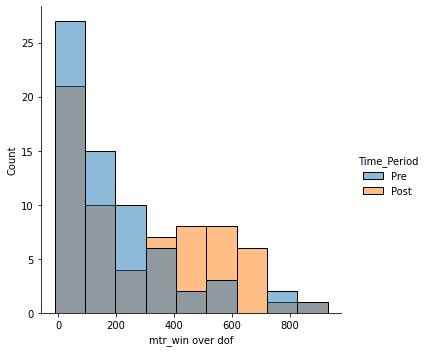

In [13]:
sns.displot(df_combo, x='mtr_win over dof', hue = 'Time_Period')

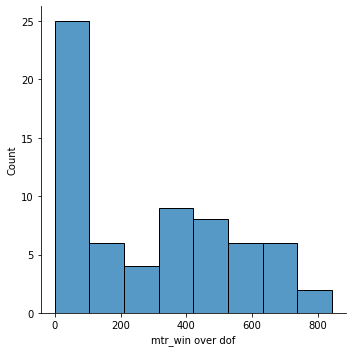

In [9]:
sns.displot(df_post, x='mtr_win over dof')

In [24]:
import plotly.express as px

fig = px.histogram(df_combo, x='mtr_win over dof', color="Time_Period", marginal="box", # can be `box`, `violin`
                         hover_data=df_combo.columns)
fig.update_layout(title_text = 'MTR_Win Distribution Post and Pre')


fig.show()

In [21]:
df_combo.to_csv('df_combo.csv')

In [17]:
import plotly.graph_objects as go

In [19]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_post['mtr_win over dof'], name = 'Post'))
fig.add_trace(go.Histogram(x=df_pre['mtr_win over dof'], name = 'Pre'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()